In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.fft import fft

<h2 align="center">Show data</h2>


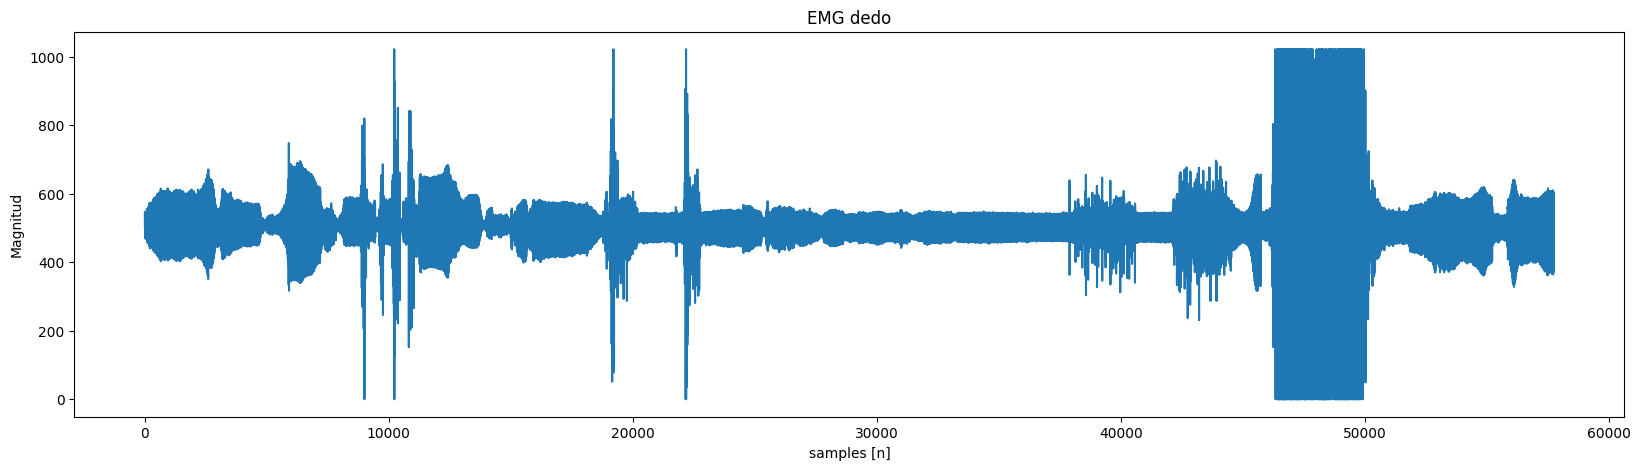

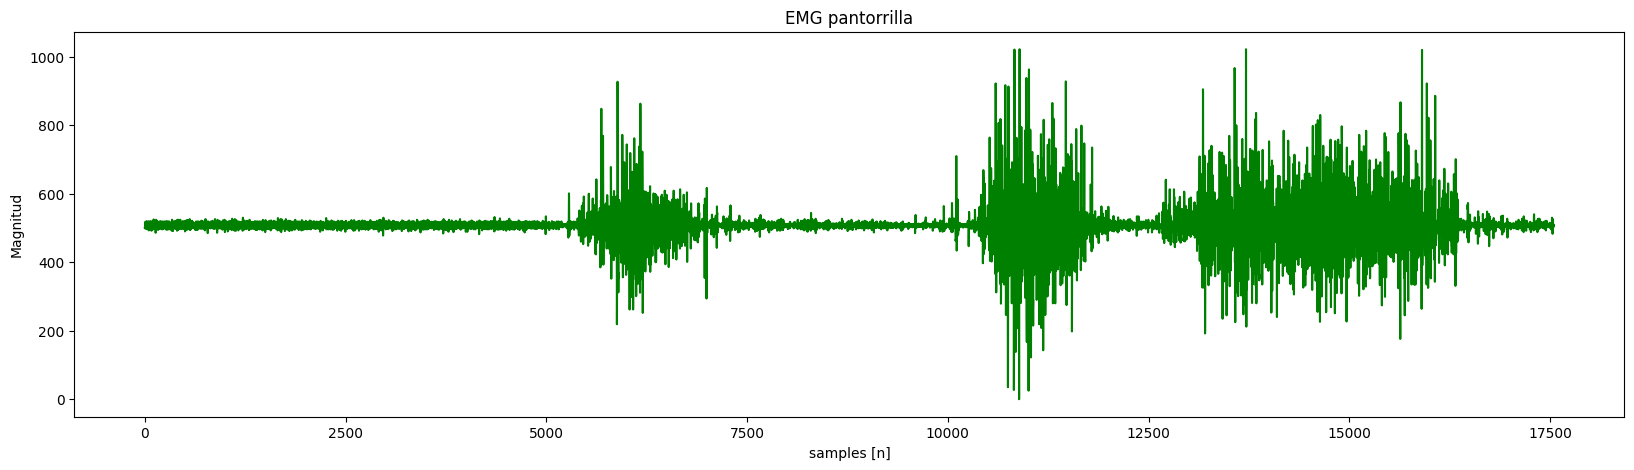

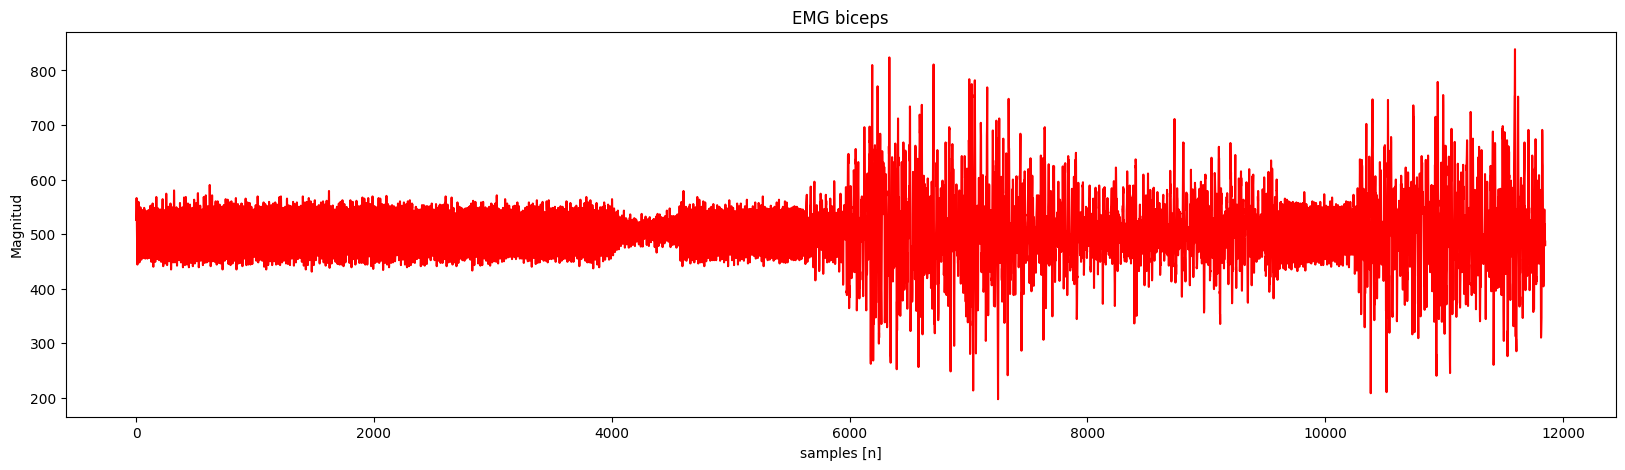

In [7]:
dedo = np.genfromtxt("dedo.txt", delimiter="\t")
pantorrilla = np.genfromtxt("pantorrilla.txt", delimiter="\t")
biceps = np.genfromtxt("biceps.txt", delimiter="\t")

dedo = dedo[:,5]
pantorrilla = pantorrilla[:,5]
biceps = biceps[:,5]

plt.figure(figsize=(20,5))
plt.title("EMG dedo")
plt.xlabel("samples [n]")
plt.ylabel("Magnitud")
plt.plot(dedo)
plt.show()

plt.figure(figsize=(20,5))
plt.title("EMG pantorrilla")
plt.xlabel("samples [n]")
plt.ylabel("Magnitud")
plt.plot(pantorrilla,'g')
plt.show()

plt.figure(figsize=(20,5))
plt.title("EMG biceps")
plt.xlabel("samples [n]")
plt.ylabel("Magnitud")
plt.plot(biceps,'r')
plt.show()

<h2 align="center"> Eliminación de línea base</h2> 

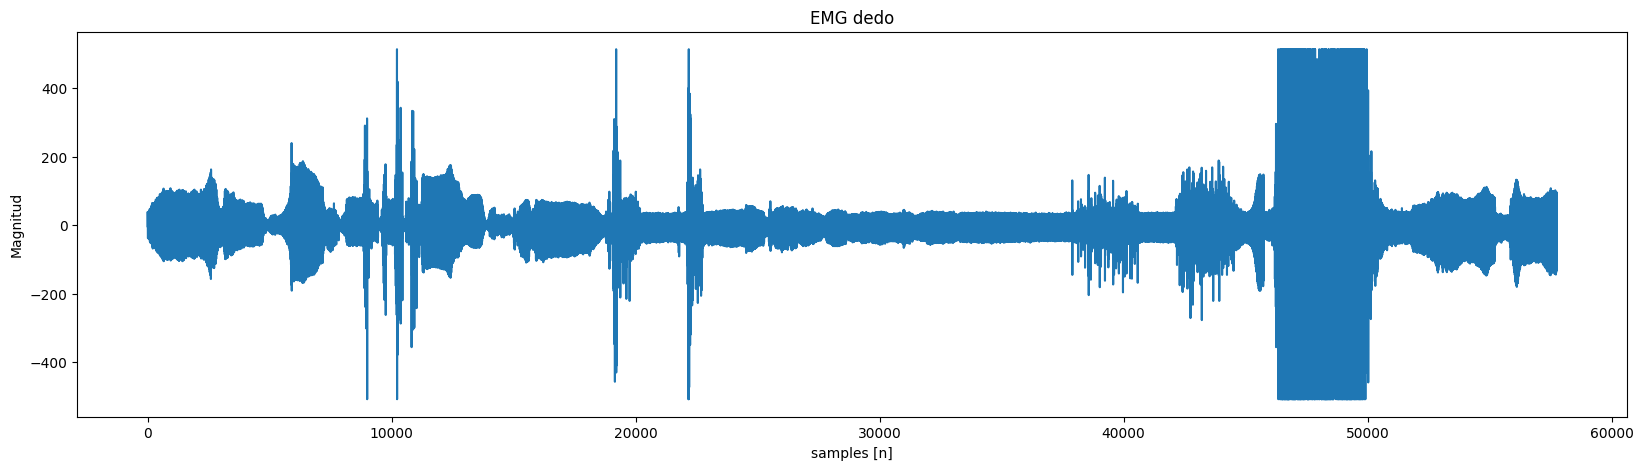

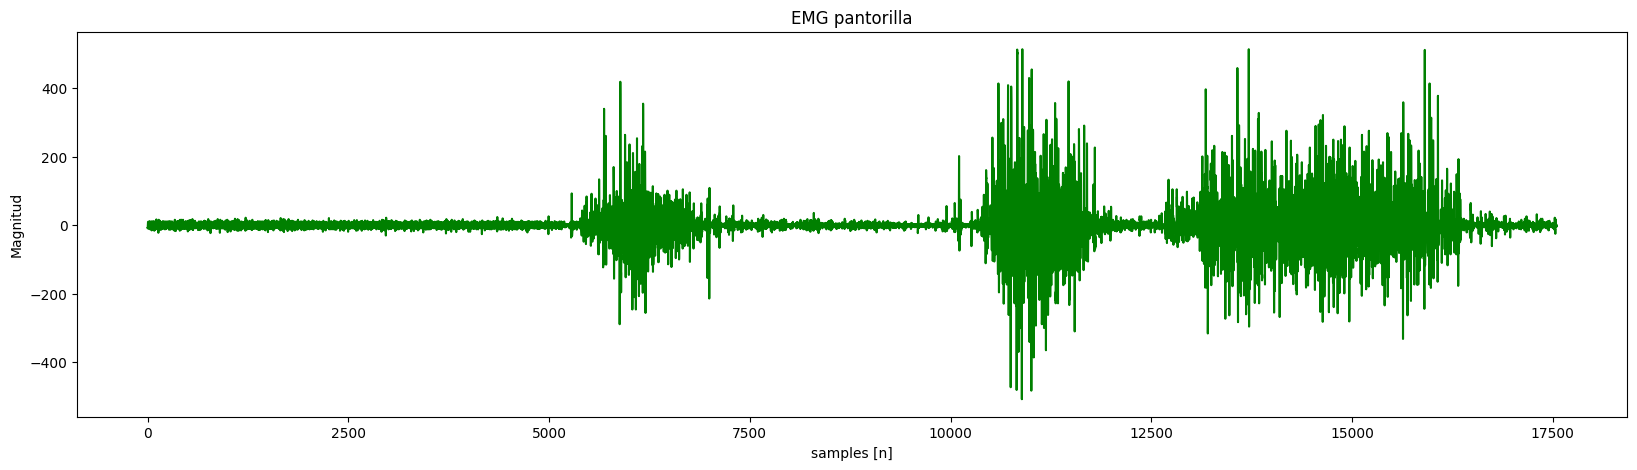

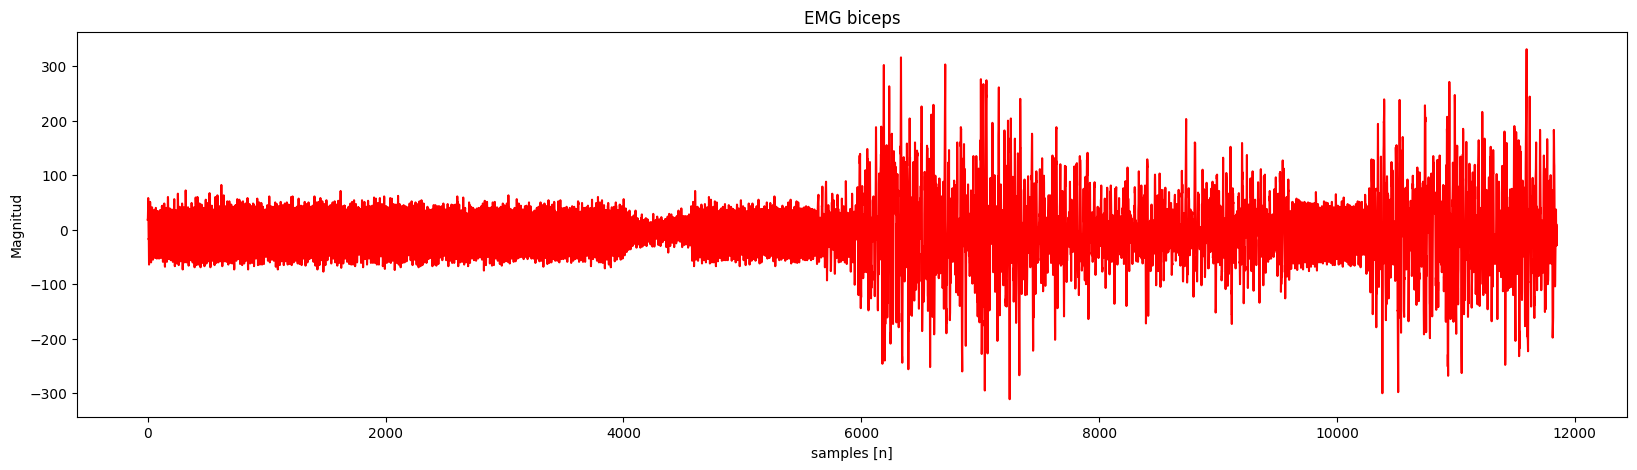

In [8]:
new_dedo = dedo - np.mean(dedo)
plt.figure(figsize=(20,5))
plt.title("EMG dedo")
plt.xlabel("samples [n]")
plt.ylabel("Magnitud")
plt.plot(new_dedo)
plt.show()

new_pantorrilla = pantorrilla - np.mean(pantorrilla)
plt.figure(figsize=(20,5))
plt.title("EMG pantorilla")
plt.xlabel("samples [n]")
plt.ylabel("Magnitud")
plt.plot(new_pantorrilla,'g')
plt.show()

new_biceps = biceps - np.mean(biceps)
plt.figure(figsize=(20,5))
plt.title("EMG biceps")
plt.xlabel("samples [n]")
plt.ylabel("Magnitud")
plt.plot(new_biceps,'r')
plt.show()

<h2 align="center"> Filtrado</h2> 

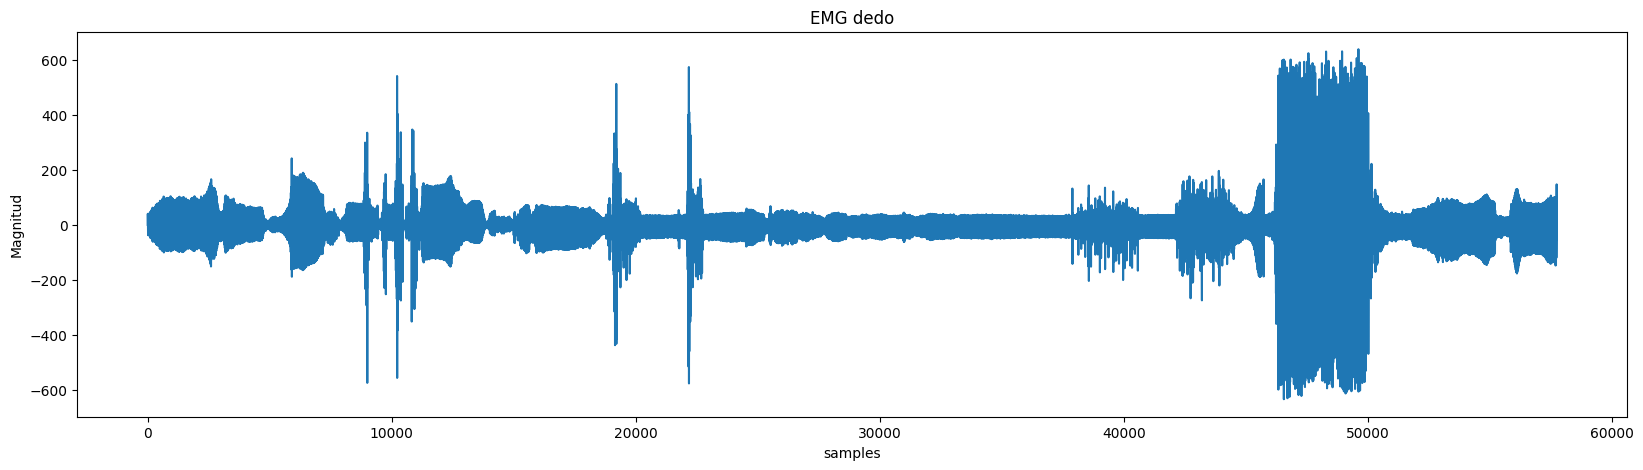

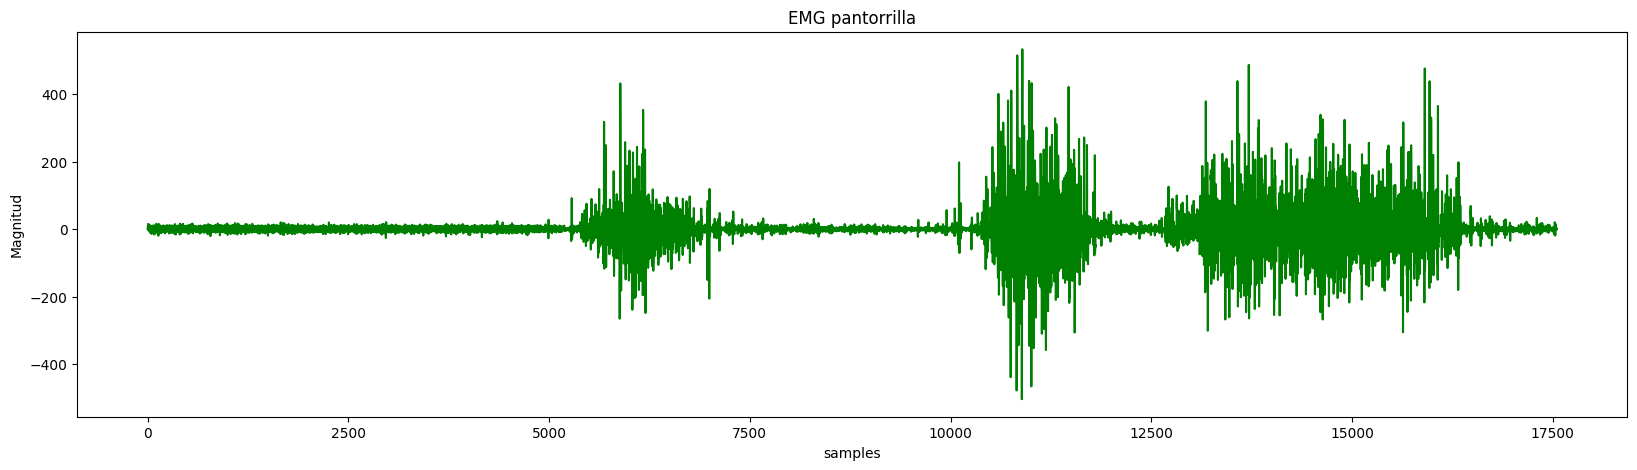

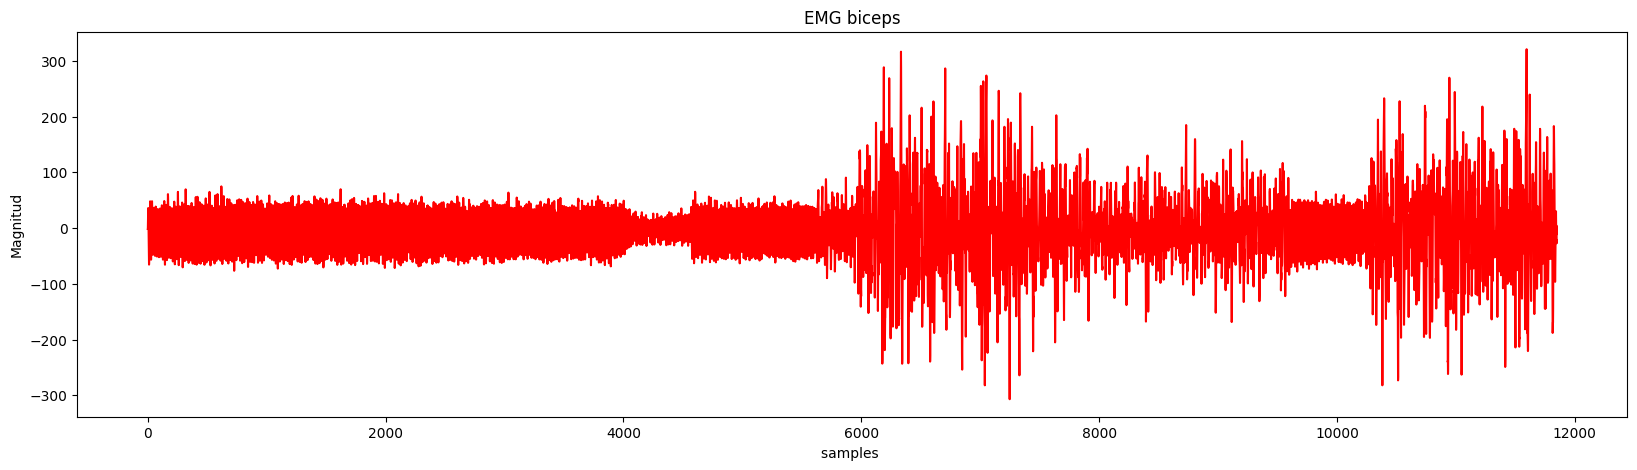

In [9]:
from scipy.signal import butter, filtfilt

# Definir las frecuencias de corte del filtro
fs = 1000 # Frecuencia de muestreo de la señal (en Hz)
lowcut = 10 # Frecuencia de corte inferior (en Hz)
highcut = 300 # Frecuencia de corte superior (en Hz)

# Calcular las frecuencias normalizadas de corte
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Calcular los coeficientes del filtro Butterworth
order = 4 # Orden del filtro
b, a = butter(order, [low, high], btype='band')

# Aplicar el filtro en cascada a la señal de EMG
dedo_filt = filtfilt(b, a, new_dedo, axis=0)

pantorrilla_filt = filtfilt(b, a, new_pantorrilla, axis=0)

biceps_filt = filtfilt(b, a, new_biceps, axis=0)

plt.figure(figsize=(20,5))
plt.title("EMG dedo")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(dedo_filt)
plt.show()

plt.figure(figsize=(20,5))
plt.title("EMG pantorrilla")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(pantorrilla_filt,'g')
plt.show()

plt.figure(figsize=(20,5))
plt.title("EMG biceps")
plt.xlabel("samples ")
plt.ylabel("Magnitud")
plt.plot(biceps_filt,'r')
plt.show()

<h2 align="center"> Normalización de la señal</h2> 

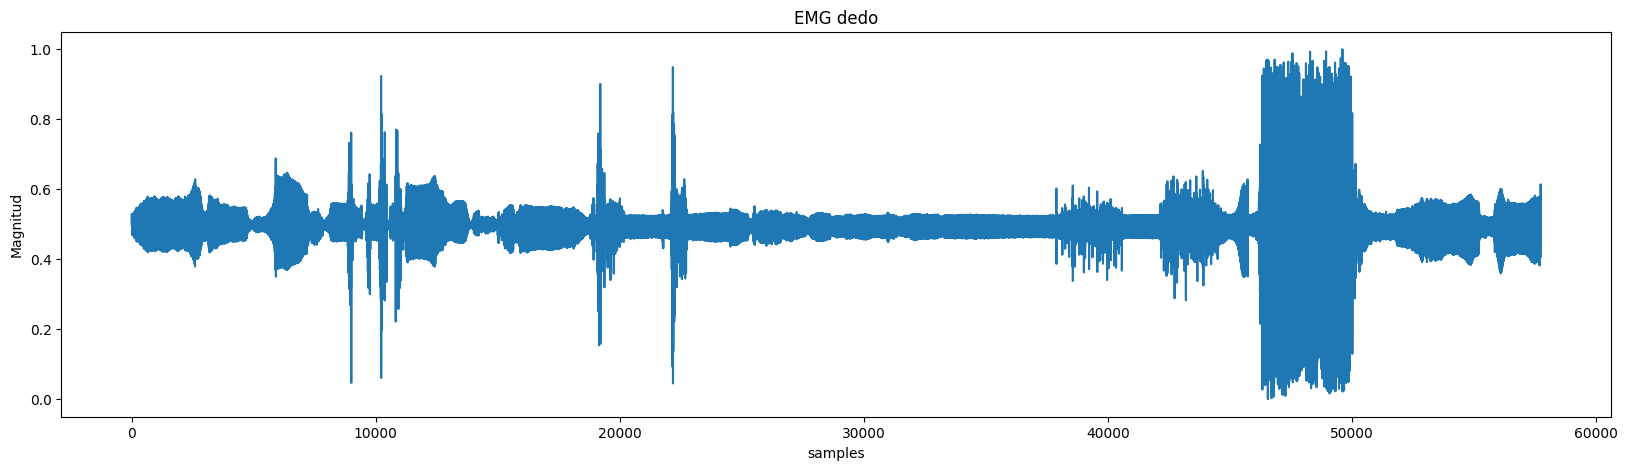

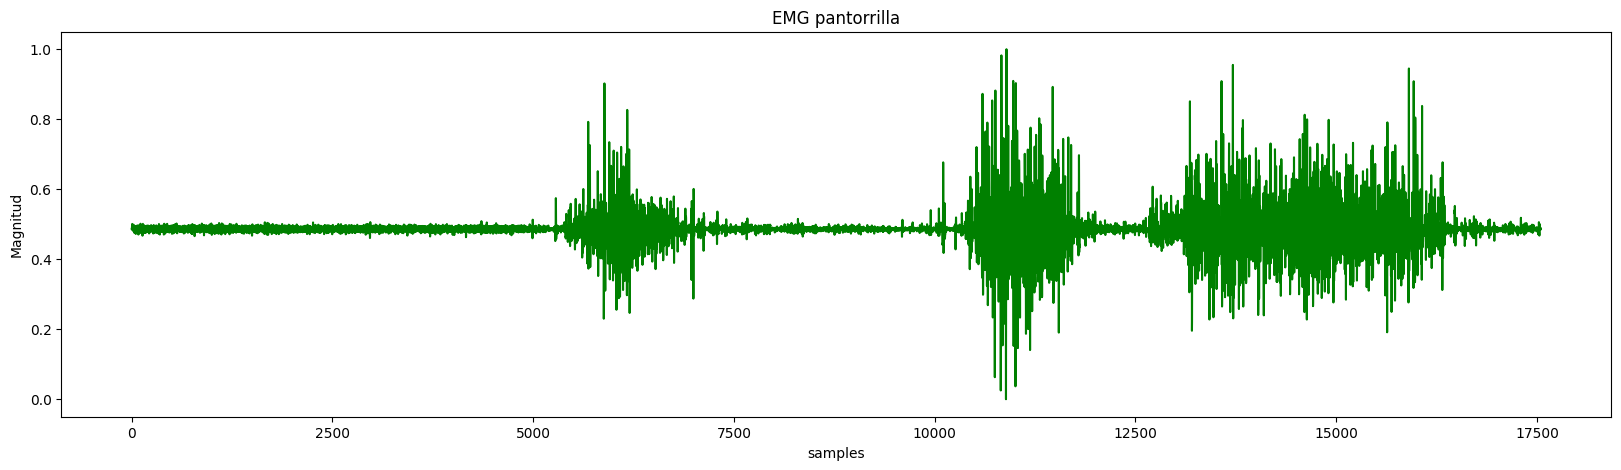

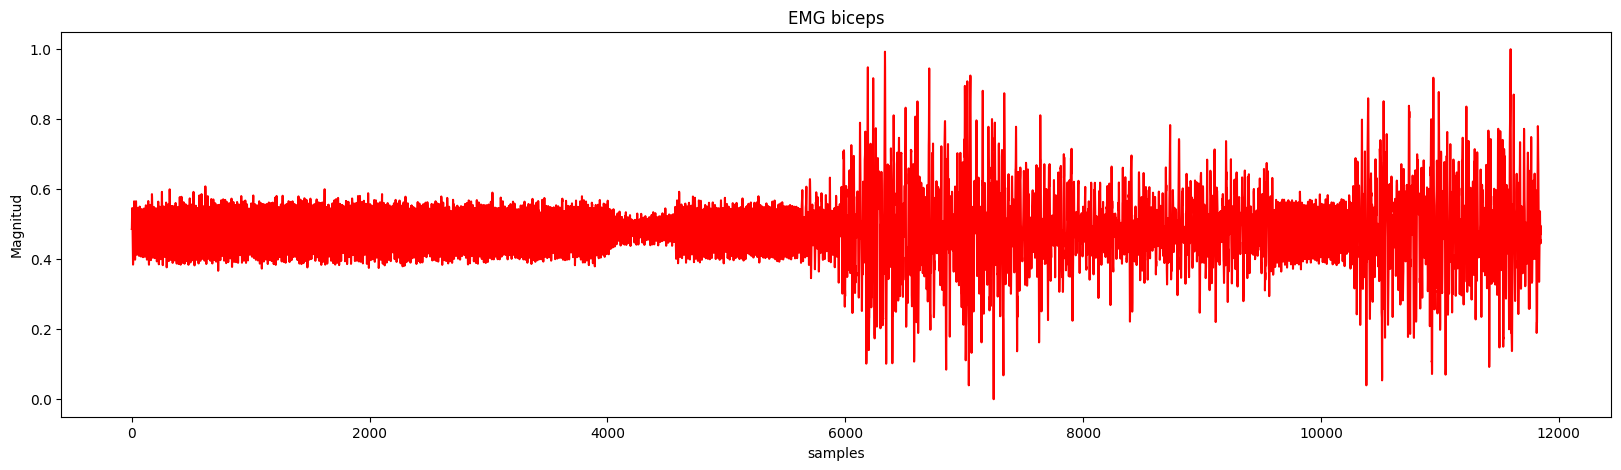

In [10]:
min_dedo = np.min(dedo_filt)
max_dedo = np.max(dedo_filt)

# Normalización mín-máx
dedo_norm = (dedo_filt - min_dedo) / (max_dedo - min_dedo)

min_pantorrilla = np.min(pantorrilla_filt)
max_pantorrilla = np.max(pantorrilla_filt)

# Normalización mín-máx
pantorrilla_norm = (pantorrilla_filt - min_pantorrilla) / (max_pantorrilla - min_pantorrilla)

min_biceps = np.min(biceps_filt)
max_biceps = np.max(biceps_filt)

# Normalización mín-máx
biceps_norm = (biceps_filt - min_biceps) / (max_biceps - min_biceps)

plt.figure(figsize=(20,5))
plt.title("EMG dedo")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(dedo_norm)
plt.show()

plt.figure(figsize=(20,5))
plt.title("EMG pantorrilla")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(pantorrilla_norm,'g')
plt.show()

plt.figure(figsize=(20,5))
plt.title("EMG biceps")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(biceps_norm,'r')
plt.show()

<h2 align="center"> Señal cuadratica</h2> 

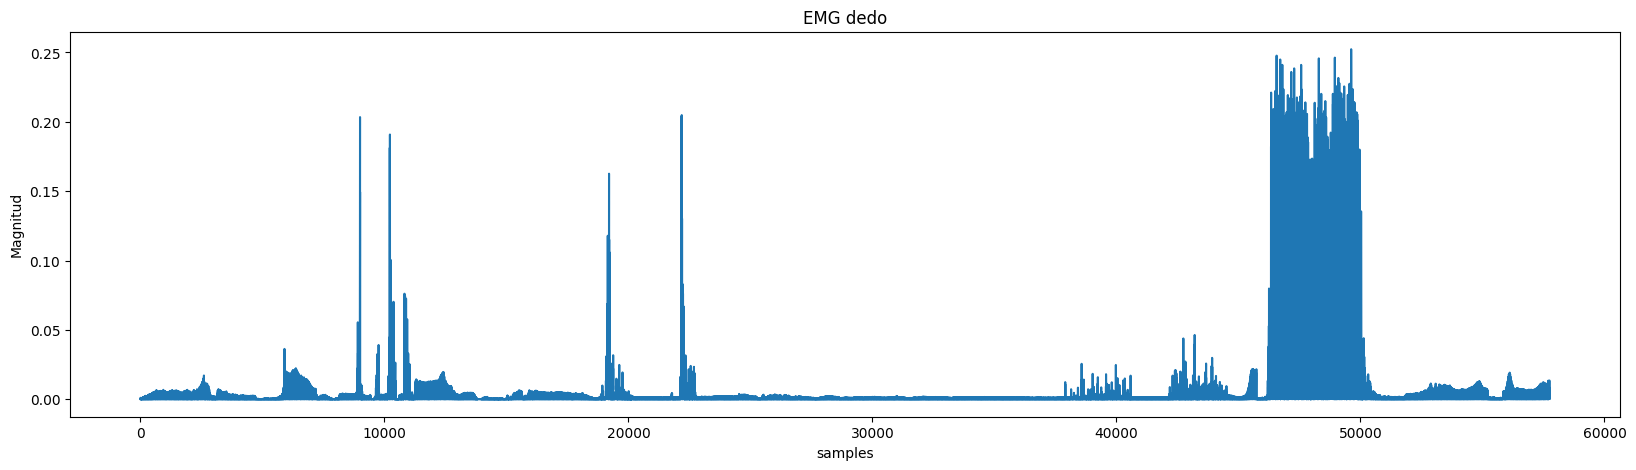

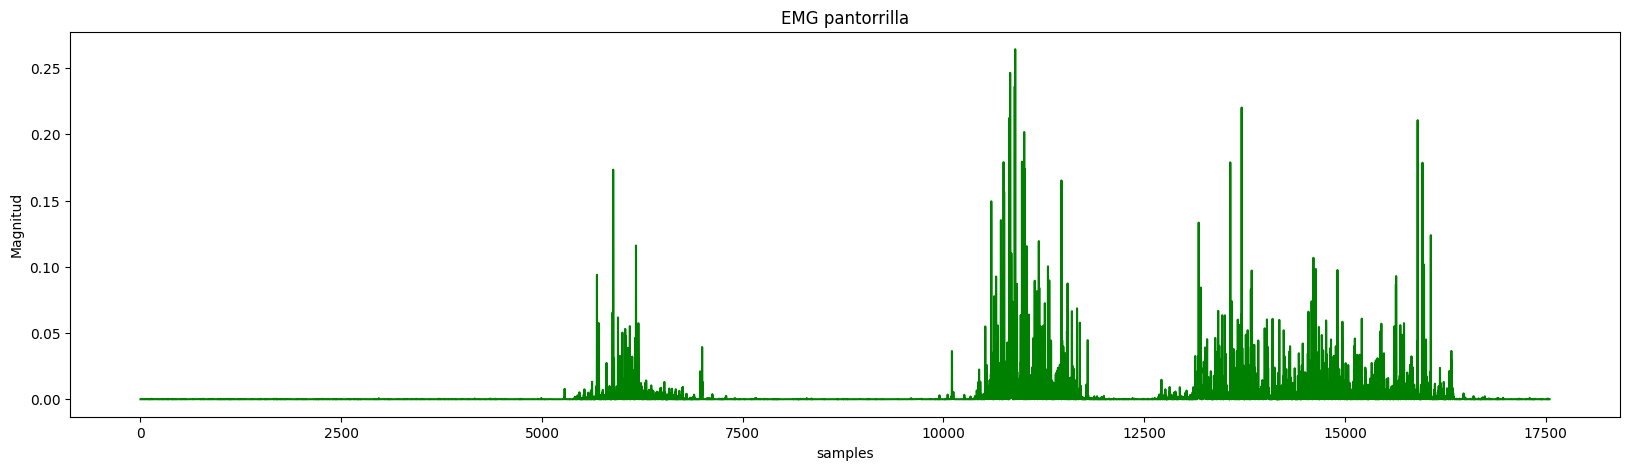

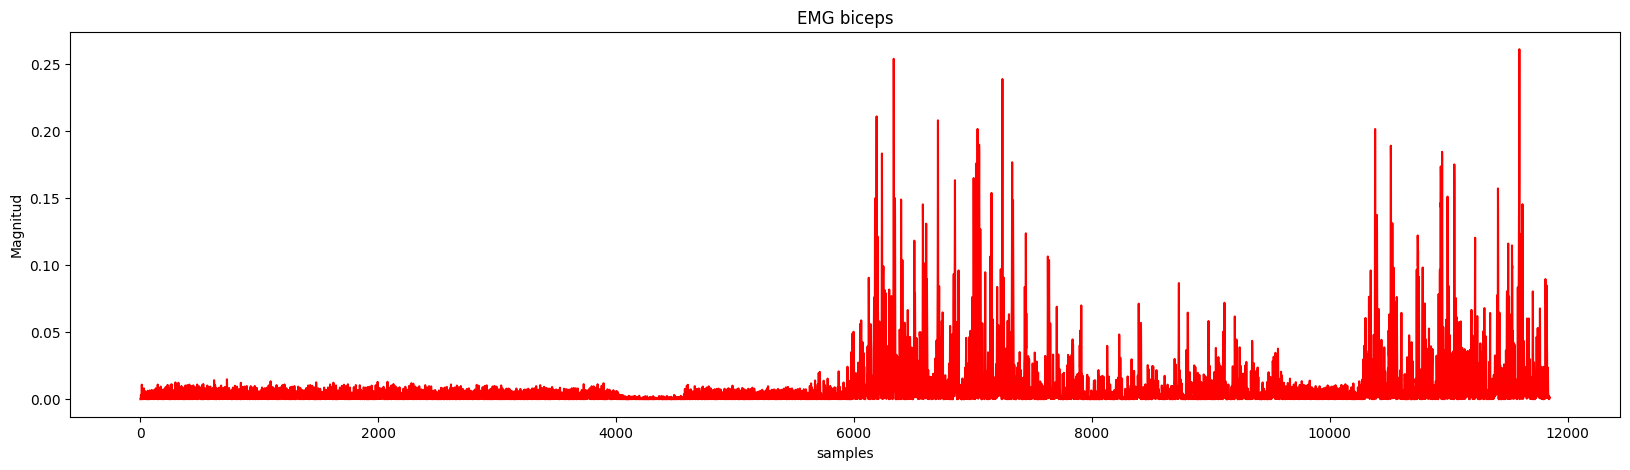

In [16]:
d = dedo_norm - np.mean(dedo_norm)
dedo_cuadra = d*d
p = pantorrilla_norm - np.mean(pantorrilla_norm)
pantorrilla_cuadra = p*p

b = biceps_norm - np.mean(biceps_norm)
biceps_cuadra = b*b

# Observar de manera visual los momentos de contracción muscular
plt.figure(figsize=(20,5))
plt.title("EMG dedo")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(dedo_cuadra)
plt.show()

plt.figure(figsize=(20,5))
plt.title("EMG pantorrilla")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(pantorrilla_cuadra,'g')
plt.show()

plt.figure(figsize=(20,5))
plt.title("EMG biceps")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(biceps_cuadra,'r')
plt.show()

<h2 align="center"> Umbral</h2> 

In [17]:
promedio_dedo = np.mean(dedo_filt)
std_dedo = np.std(dedo_filt)

promedio_pantorrilla = np.mean(pantorrilla_filt)
std_pantorrilla = np.std(pantorrilla_filt)

promedio_biceps = np.mean(biceps_filt)
std_biceps = np.std(biceps_filt)

<h2 align="center"> Umbrales extremos</h2> 

In [18]:
threshold_level = 10
# threshold_level_norm_10 = normReg(threshold_level)
threshold_10_dedo = promedio_dedo + threshold_level*std_dedo/10

threshold_10_pantorrilla = promedio_pantorrilla + threshold_level*std_pantorrilla/10

threshold_10_biceps = promedio_biceps + threshold_level*std_biceps/10

threshold_level = 80
# threshold_level_norm_80 = normReg(threshold_level)
threshold_80_dedo = promedio_dedo + threshold_level*std_dedo*np.log10(threshold_level)

threshold_80_pantorrilla = promedio_pantorrilla + threshold_level*std_pantorrilla*np.log10(threshold_level)

threshold_80_biceps = promedio_biceps + threshold_level*std_biceps*np.log10(threshold_level)

<h2 align="center">Onda cuadrada</h2>

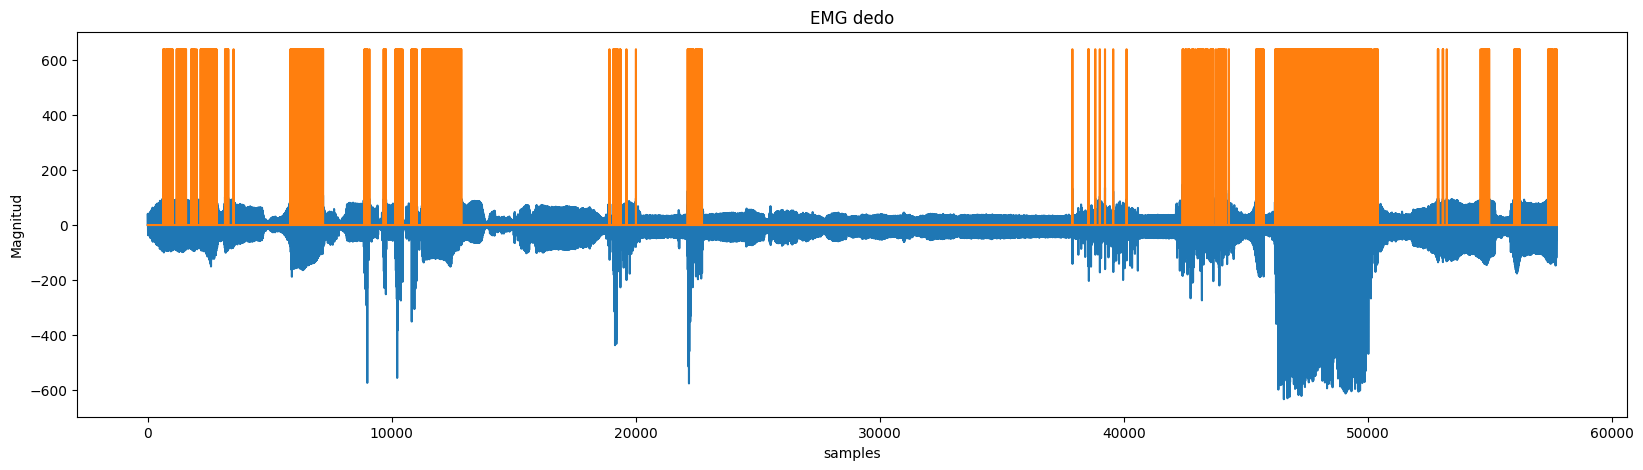

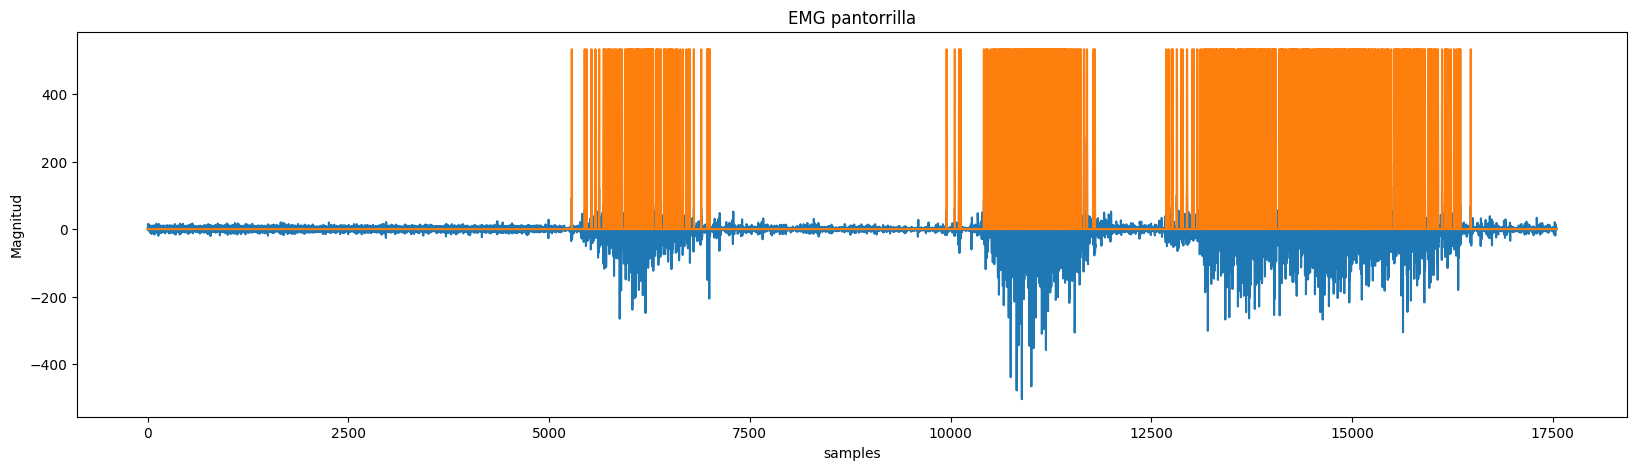

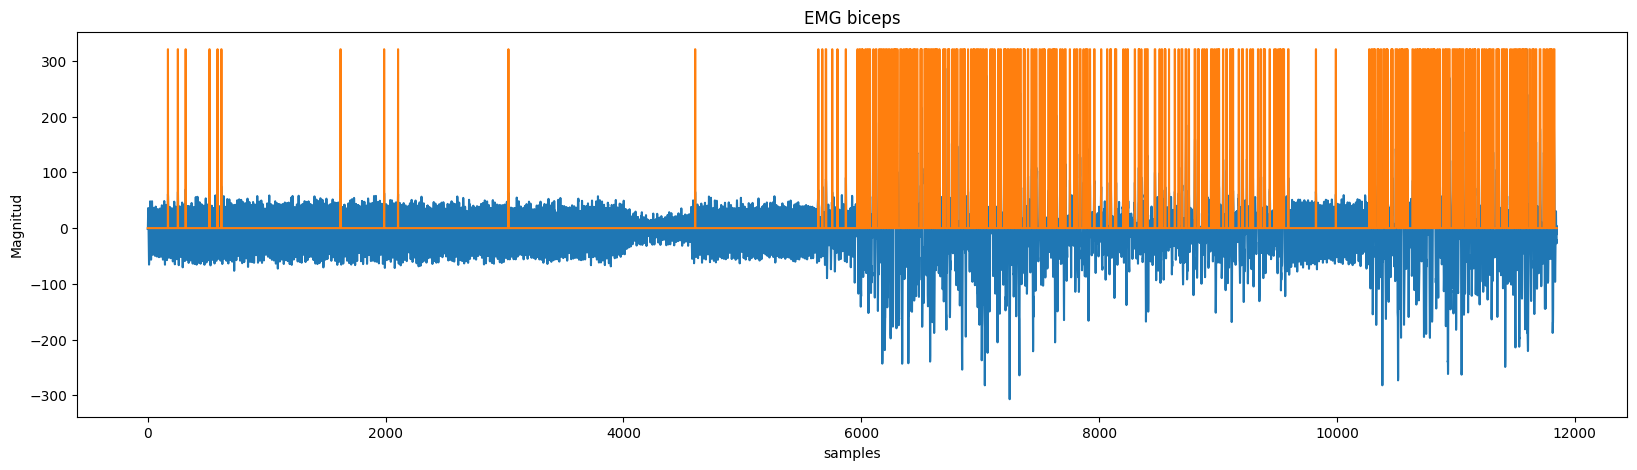

In [46]:
cuadrado_dedo = []
max1 = np.max(dedo_filt)
for i in range(0, len(dedo_filt)):
    if dedo_filt[i] >= threshold_10_dedo:
        cuadrado_dedo.append(max1)
    else:
        cuadrado_dedo.append(0)

plt.figure(figsize=(20,5))
plt.title("EMG dedo")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(dedo_filt)
plt.plot(cuadrado_dedo)
plt.show()

cuadrado_pantorrilla = []
max2 = np.max(pantorrilla_filt)
for i in range(0, len(pantorrilla_filt)):
    if pantorrilla_filt[i] >= threshold_10_pantorrilla:
        cuadrado_pantorrilla.append(max2)
    else:
        cuadrado_pantorrilla.append(0)

plt.figure(figsize=(20,5))
plt.title("EMG pantorrilla")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(pantorrilla_filt)
plt.plot(cuadrado_pantorrilla)
plt.show()

cuadrado_biceps = []
max3 = np.max(biceps_filt)
for i in range(0, len(biceps_filt)):
    if biceps_filt[i] >= threshold_10_biceps:
        cuadrado_biceps.append(max3)
    else:
        cuadrado_biceps.append(0)

plt.figure(figsize=(20,5))
plt.title("EMG biceps")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(biceps_filt)
plt.plot(cuadrado_biceps)
plt.show()

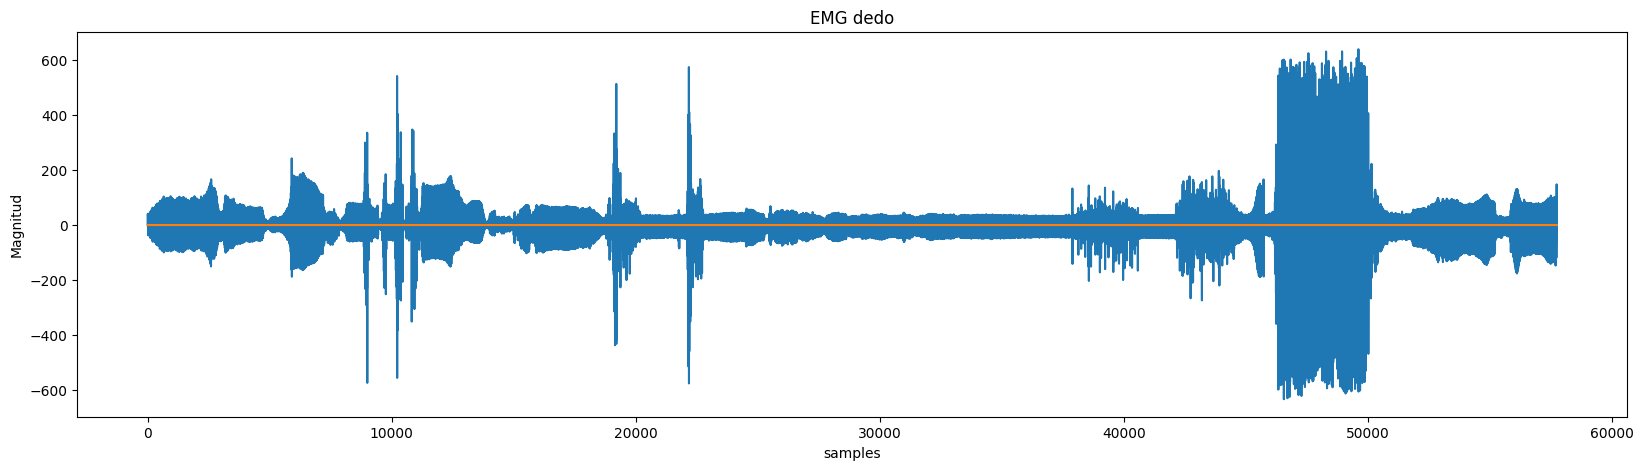

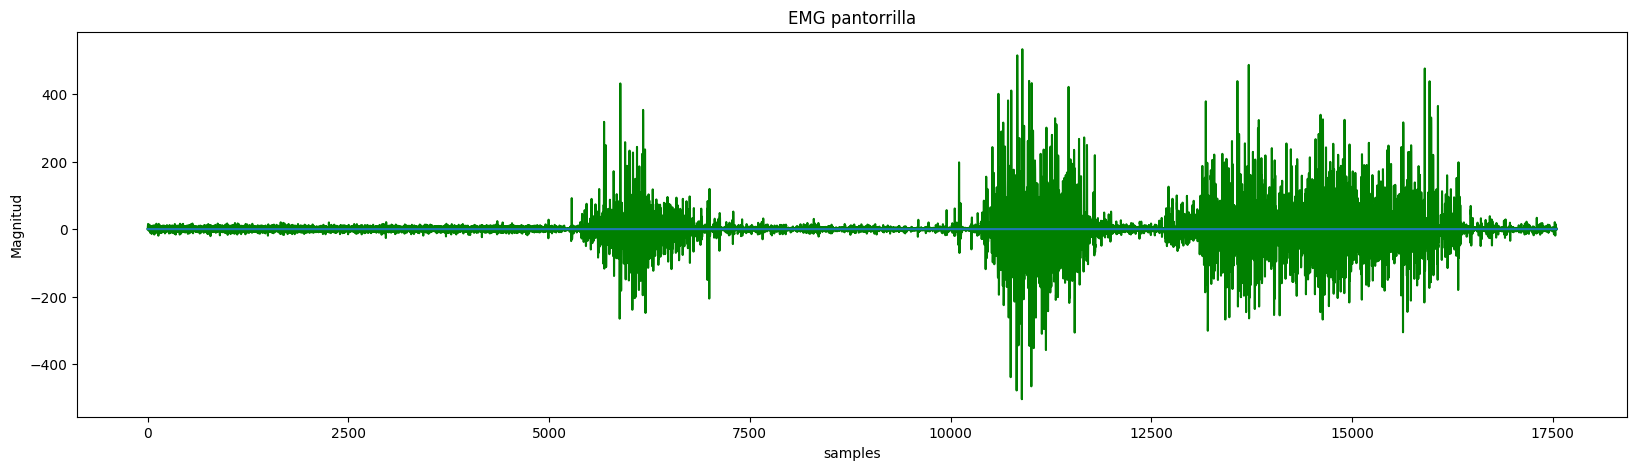

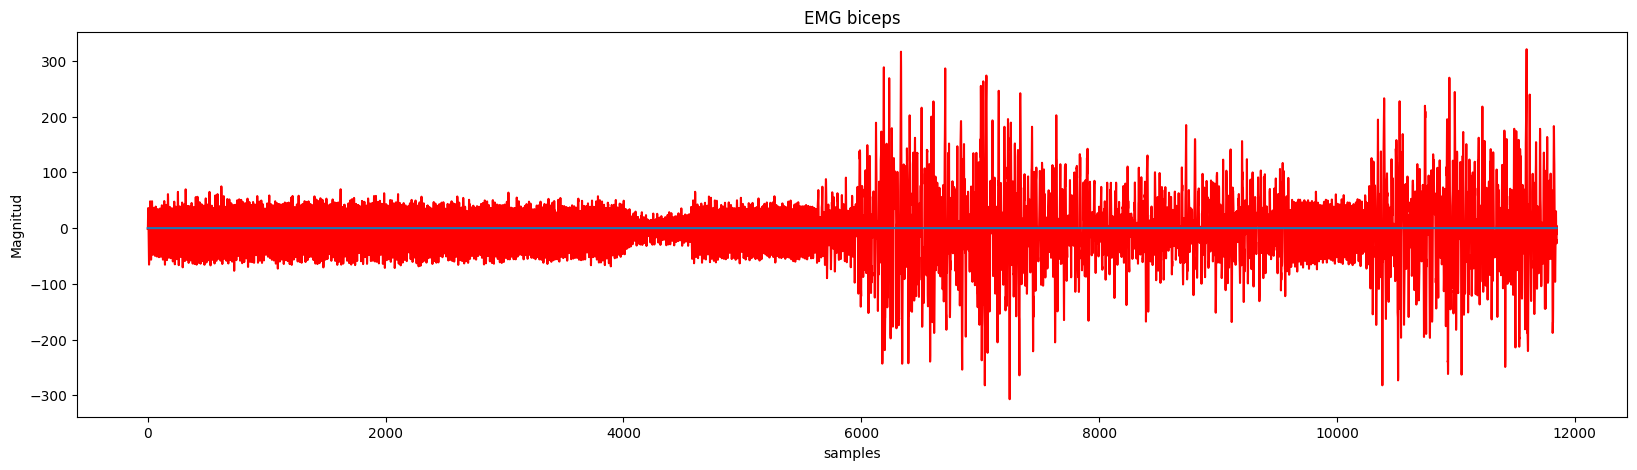

In [27]:
cuadrado_dedo = []
max1 = np.max(dedo_filt)
for i in range(0, len(dedo_filt)):
    if dedo_filt[i] >= threshold_80_dedo:
        cuadrado_dedo.append(max1)
    else:
        cuadrado_dedo.append(0)

plt.figure(figsize=(20,5))
plt.title("EMG dedo")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(dedo_filt)
plt.plot(cuadrado_dedo)
plt.show()

cuadrado_pantorrilla = []
max2 = np.max(pantorrilla_filt)
for i in range(0, len(pantorrilla_filt)):
    if pantorrilla_filt[i] >= threshold_80_pantorrilla:
        cuadrado_pantorrilla.append(max2)
    else:
        cuadrado_pantorrilla.append(0)

plt.figure(figsize=(20,5))
plt.title("EMG pantorrilla")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(pantorrilla_filt,'g')
plt.plot(cuadrado_pantorrilla)
plt.show()

cuadrado_biceps = []
max3 = np.max(biceps_filt)
for i in range(0, len(biceps_filt)):
    if biceps_filt[i] >= threshold_80_biceps:
        cuadrado_biceps.append(max3)
    else:
        cuadrado_biceps.append(0)

plt.figure(figsize=(20,5))
plt.title("EMG biceps")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(biceps_filt,'r')
plt.plot(cuadrado_biceps)
plt.show()

<h2 align="center"> Root mean square</h2> 

In [31]:
rms_dedo = np.sqrt(sum(dedo_filt*dedo_filt)/len(dedo_filt))
print('EMG dedo:',rms_dedo)

EMG dedo: 93.53718074678639


In [30]:
rms_pantorrilla = np.sqrt(sum(pantorrilla_filt*pantorrilla_filt)/len(pantorrilla_filt))
print('EMG pantorrilla:',rms_pantorrilla)

EMG pantorrilla: 55.66308786893953


In [32]:
rms_biceps = np.sqrt(sum(biceps_filt*biceps_filt)/len(biceps_filt))
print('EMG bíceps:',rms_biceps)

EMG bíceps: 59.92666012366912


<h2 align="center"> Área bajo la curva</h2> 

In [45]:
from scipy.integrate import cumtrapz
area_dedo = cumtrapz(dedo_filt)
print('el área debajo de la curva es:',area_dedo[-1])

el área debajo de la curva es: 734.1829177601683


In [44]:
area_pantorrilla = cumtrapz(pantorrilla_filt)
area_pantorrilla[-1]
print('el área debajo de la curva es:',area_pantorrilla[-1])

el área debajo de la curva es: 96.16063192882143


In [43]:
area_biceps = cumtrapz(biceps_filt)
print('el área debajo de la curva es:',area_biceps[-1])

el área debajo de la curva es: -45.25295355693922


<h2 align="center"> Potencia espectral</h2> 

In [57]:
f,P=scipy.signal.welch(dedo_filt,fs=fs,window='hann',noverlap=0,nfft=int(256.))
area_freq= cumtrapz(P,f,initial=0)
total_power=area_freq[-1]
median_freq=f[np.where(area_freq>= total_power/2)[0][0]]
f_max=f[np.argmax(P)]
print('Potencia total de EMG de dedo', P)
print('Frecuencia media de EMG de dedo',median_freq)
print('Frecuencia máxima de EMG de dedo',f_max)

Potencia total de EMG de dedo [3.45352068e-01 1.70617274e-01 1.17974045e-01 9.27336321e-01
 2.26495592e+00 3.02086396e+00 5.65640162e+00 9.58815480e+00
 1.26596562e+01 3.33726241e+01 4.51377848e+01 6.55935297e+01
 5.58260997e+01 4.04784950e+01 7.83083124e+01 3.52703895e+02
 2.71355402e+02 6.57308940e+01 6.04268160e+01 6.07356482e+01
 6.45503359e+01 6.36972849e+01 9.15804458e+01 8.98492709e+01
 6.52997719e+01 5.94466364e+01 5.49622052e+01 4.68702560e+01
 4.18300767e+01 3.96758815e+01 4.78478224e+01 4.53175998e+01
 3.58157573e+01 2.69277956e+01 2.76230281e+01 2.75128279e+01
 2.64645240e+01 2.71839131e+01 2.20017870e+01 1.36766979e+01
 1.93983448e+01 2.27290644e+01 1.88754264e+01 1.30585702e+01
 8.25819431e+00 7.55491353e+00 7.77314520e+00 5.85469833e+00
 5.92949941e+00 4.87143443e+00 6.85441748e+00 4.71105611e+00
 4.17818953e+00 4.11671057e+00 3.41023459e+00 2.87587994e+00
 2.19304497e+00 4.39584944e+00 4.19438954e+00 2.45411805e+00
 3.55297071e+00 4.01676441e+00 3.40653937e+00 2.5322492